In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('mobile_recommendation_system_dataset.csv')
df.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


In [3]:
df.shape

(2546, 5)

In [4]:
df.isnull().sum()

name        0
ratings     0
price       0
imgURL      0
corpus     12
dtype: int64

In [5]:
df1=df.dropna()
df1.shape

(2534, 5)

In [6]:
df1.isnull().sum()

name       0
ratings    0
price      0
imgURL     0
corpus     0
dtype: int64

In [7]:
import re
def extract_storage(corpus):
    """Extract the storage capacity from the corpus."""
    match=re.search(r'Storage(\d+)', corpus)
    if match:
        return int(match.group(1))
    return None
df1['Storage'] = df1['corpus'].apply(extract_storage)
df1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\551546990.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Storage'] = df1['corpus'].apply(extract_storage)


,name,ratings,price,imgURL,corpus,Storage
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0


In [8]:
"""Similarly extract RAM, OD, processor"""

def extract_ram(corpus):
    match = re.search(r'RAM(\d+)', corpus)
    if match:
        return int(match.group(1))
    return None

def extract_system(corpus):
    match = re.search(r'System(.*?)Processor', corpus)
    if match:
        return match.group(1).strip()
    return None

def extract_processor(corpus):
    match = re.search(r'Processor (.*?) ', corpus)
    if match:
        return match.group(1).strip()
    return None
df1['RAM'] = df1['corpus'].apply(extract_ram)
df1['System'] = df1['corpus'].apply(extract_system)
df1['Processor'] = df1['corpus'].apply(extract_processor)

df1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\1646022288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['RAM'] = df1['corpus'].apply(extract_ram)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\1646022288.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['System'] = df1['corpus'].apply(extract_system)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\1646022288.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android 12,TypeMediatek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android Pie 9.0,TypeMediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android 11,Speed2.4
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android Q 11,TypeQualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS 15,TypeA15


In [9]:
"""Unique values of system and processor"""
unique_systems = df1['System'].unique()
unique_processors = df1['Processor'].unique()

print("Unique systems:\n",unique_systems)
print("Unique processors:\n",unique_processors)

Unique systems:
 ['Android 12' 'Android Pie 9.0' 'Android 11' 'Android Q 11' 'iOS 15'
 'iOS 9' 'Android 13' 'Android Pie 9' 'Android Nougat 7' 'Android 10'
 'iOS 16' None 'Android Q Android Q 12.5' 'Android Oreo 8.1'
 'Android Marshmallow 6.0.1' 'Android Oreo 8.1.0'
 'Android 13 (Go Edition)' 'Android Android 12' 'Android Q 10' 'iOS 14.2'
 'Android Pie Android v9.0 (Pie)' 'Android Andriod 11'
 'Android Android 10' 'Android HiOS 8.6 based on Android 12-Go Edition'
 'Android Nougat 7.1' 'iOS 14' 'Android Android 13' 'iOS 12'
 'Android 12 Go' 'iOS 7' 'Android Nougat 7.1.2' 'Android Oreo V11'
 'Android ANdroid 13 OxygenOS' 'Android Android 13.0'
 'Android Android v12.0' 'Android Android 11' 'Android Pie 10'
 'Android Oreo 8.0' 'Q 10' 'Android Q ANDROID 10' 'Android Q 12' 'iOS 13'
 'Android Android 11 Go' 'Android 10 (Go Edition)'
 'Android Oxygen OxygenOS based on Android 13' 'Series 30 Feature phone'
 'Android Lollipop 5.1' 'Android Q 111' 'iOS 8' 'Android Q Android 11'
 'Android ?HiOS 12

In [10]:
"""Cleaning system values -> Android Q 10.1 to Android, iOS 15 to iOS, etc"""

def clean_system(system):
    if pd.isnull(system):
        return None
    if 'android' in system.lower():
        return 'Android'
    if 'ios' in system.lower():
        return 'iOS'
    if 'tizen' in system.lower():
        return 'Tizen'
    return system
df1['System']=df1['System'].apply(clean_system)
unique_system=df1['System'].unique()
unique_system

C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\2210038624.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['System']=df1['System'].apply(clean_system)


array(['Android', 'iOS', None, 'Q 10', 'Series 30 Feature phone', '1',
       'Series 30', 'Tizen'], dtype=object)

In [11]:
"""Similarly Processor"""

def clean_processor(processor):
    if pd.isnull(processor):
        return None
    if 'mediatek' in processor.lower():
        return 'MediaTek'
    if 'qualcomm' in processor.lower():
        return 'Qualcomm'
    if 'apple' in processor.lower():
        return 'Apple'
    return 'Other'
df1['Processor']=df1['Processor'].apply(clean_processor)
unique_processors=df1['Processor'].unique()
unique_processors

C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\2245617549.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Processor']=df1['Processor'].apply(clean_processor)


array(['MediaTek', 'Other', 'Qualcomm', None, 'Apple'], dtype=object)

In [16]:
df1.loc[df1['RAM'].isnull()].head(10)

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other
5,"APPLE iPhone 6s Plus (Gold, 64 GB)",4.5,5537,https://rukminim2.flixcart.com/image/312/312/m...,Storage64 SystemiOS 9Processor TypeA9 Chip 12...,64.0,NaN,iOS,Other
16,"APPLE iPhone 14 Plus ((PRODUCT)RED, 256 GB)",4.6,24463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemiOS 16Processor TypeA15 Bion...,256.0,NaN,iOS,Other
28,"OPPO Reno10 5G (Ice Blue, 256 GB)",4.6,32537,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemAndroid 13Processor TypeDimen...,256.0,NaN,Android,Other
40,"APPLE iPhone XR ((PRODUCT)RED, 64 GB)",4.4,28537,https://rukminim2.flixcart.com/image/312/312/j...,Storage64 SystemiOS 14.2Processor TypeA12 Bio...,64.0,NaN,iOS,Other
43,"APPLE iPhone 14 Pro (Gold, 256 GB)",4.7,73,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemiOS 16Processor TypeA16 Bion...,256.0,NaN,iOS,Other
54,"APPLE iPhone 14 Plus (Midnight, 256 GB)",4.4,24463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemiOS 16Processor TypeA15 Bion...,256.0,NaN,iOS,Other
72,"APPLE iPhone 6s (Silver, 64 GB)",4.5,15537,https://rukminim2.flixcart.com/image/312/312/m...,Storage64 SystemiOS 9Processor TypeA9 Chip 12...,64.0,NaN,iOS,Other
75,"APPLE iPhone 14 Pro Max (Gold, 512 GB)",4.7,26927,https://rukminim2.flixcart.com/image/312/312/x...,Storage512 SystemiOS 16Processor TypeA16 Bion...,512.0,NaN,iOS,Other
78,"APPLE iPhone 13 Pro Max (Sierra Blue, 1 TB)",4.6,24927,https://rukminim2.flixcart.com/image/312/312/k...,Storage1024 SystemiOS 15Processor TypeA15 Bio...,1024.0,NaN,iOS,Other


In [17]:
np.sort(df1.loc[df1['name'].str.contains('iPhone')].name.values)

array(['APPLE iPhone 11 (Black, 128 GB)',
       'APPLE iPhone 11 (Black, 64 GB)',
       'APPLE iPhone 11 (Purple, 128 GB)',
       'APPLE iPhone 11 (Purple, 64 GB)', 'APPLE iPhone 11 (Red, 128 GB)',
       'APPLE iPhone 11 (White, 128 GB)',
       'APPLE iPhone 11 (White, 64 GB)',
       'APPLE iPhone 11 (Yellow, 64 GB)',
       'APPLE iPhone 11 (Yellow, 64 GB)',
       'APPLE iPhone 11 Pro (Gold, 256 GB)',
       'APPLE iPhone 11 Pro (Gold, 512 GB)',
       'APPLE iPhone 11 Pro (Gold, 64 GB)',
       'APPLE iPhone 11 Pro (Midnight Green, 256 GB)',
       'APPLE iPhone 11 Pro (Midnight Green, 64 GB)',
       'APPLE iPhone 11 Pro (Silver, 256 GB)',
       'APPLE iPhone 11 Pro (Silver, 512 GB)',
       'APPLE iPhone 11 Pro (Silver, 64 GB)',
       'APPLE iPhone 11 Pro (Space Grey, 256 GB)',
       'APPLE iPhone 11 Pro (Space Grey, 512 GB)',
       'APPLE iPhone 11 Pro (Space Grey, 64 GB)',
       'APPLE iPhone 11 Pro Max (Gold, 256 GB)',
       'APPLE iPhone 11 Pro Max (Midnight Green,

In [18]:
iphone_ram_mapping = {
    'iPhone 14': 6,
    'iPhone 13': 4,
    'iPhone 13 Pro': 6,
    'iPhone 12': 4,
    'iPhone 12 Pro': 6,
    'iPhone 11': 4,
    'iPhone X': 3,
    'iPhone XR': 3,
    'iPhone XS': 4,
    'iPhone 8': 2,
    'iPhone 8 Plus': 3,
    'iPhone 7': 2,
    'iPhone 7 Plus': 3,
    'iPhone 6': 1,
    'iPhone 6S': 2,
    'iPhone 5': 1,
    'iPhone SE': 2,
    'iPhone SE 3rd Gen': 4, 
    'IPhone 4': .512
}
for model_name, ram_value in iphone_ram_mapping.items():
    df1.loc[df1['name'].str.contains(model_name, case = True), 'RAM'] = ram_value

In [22]:
df1.loc[df1['System'].isnull()].name.values

array(['Xiaomi 11T Pro 5G Hyperphone (Celestial Magic, 256 GB)',
       'REDMI 11 Prime 5G (Meadow Green, 128 GB)', 'a 10e',
       'Tecno Spark 8 Pro (Turquoise Cyan, 64 GB)',
       'OnePlus NORD CE2 LITE 5G (Blue, Black, 128 GB)',
       'SAMSUNG Guru Music 2', 'Tecno Spark Go 2022 (Iris Purple, 32 GB)',
       'Xiaomi 11T Pro 5G Hyperphone (Meteorite Black, 256 GB)',
       'vivo Z1x (Fusion Blue, 128 GB)', 'SAMSUNG Guru FM Plus',
       'Tecno Spark 10 pro (Meta Blue, 8 GB)',
       'OnePlus 10R 5G (Sierra Black, 256 GB)',
       'OPPO F23 5G | 64MP Rear Triple AI Camera | 6.72" FHD+ 120Hz Display (Cool Black, 256 GB)',
       'OnePlus 10R 5G (Prime Blue, 128 GB)',
       'Tecno Spark 10 5G (Meta Blue, 128 GB)', 'SAMSUNG Metro 313',
       'REDMI 12C (Royal Blue, 6 GB)',
       'REDMI 11 Prime 5G (Thunder Black, 64 GB)',
       'APPLE IPhone 4 (White, 8 GB)', 'Peace Mi2',
       'OPPO F23 5G | 64MP Rear Triple AI Camera | 6.72" FHD+ 120Hz Display (Bold Gold, 256 GB)',
       'Tecn

In [23]:
df1['System'].fillna('Android', inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\3037269825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['System'].fillna('Android', inplace = True)


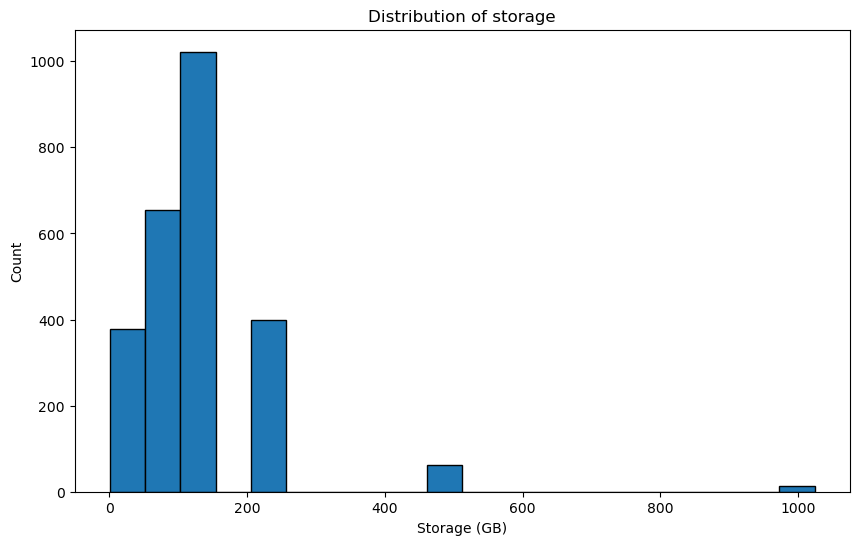

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df1['Storage'],bins=20,edgecolor='black')
plt.title('Distribution of storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Count')
plt.show()

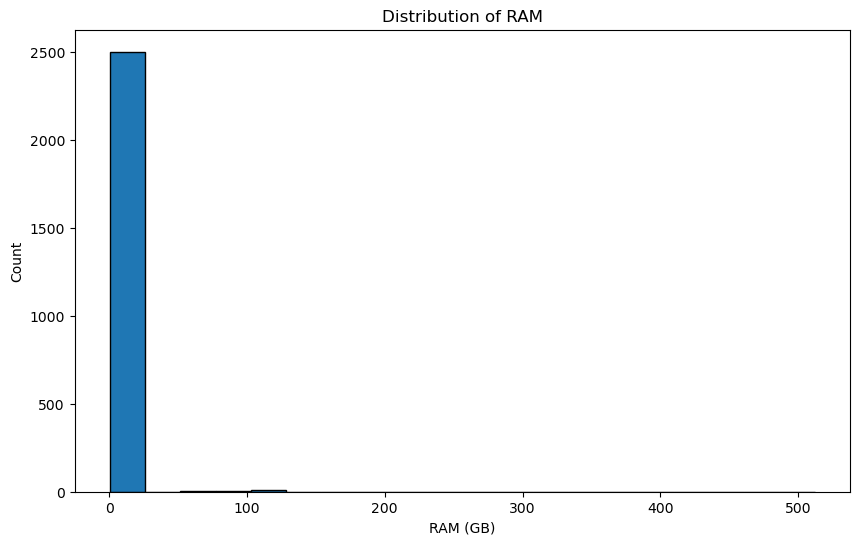

In [25]:
plt.figure(figsize=(10,6))
plt.hist(df1['RAM'].dropna(),bins=20,edgecolor='black')
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

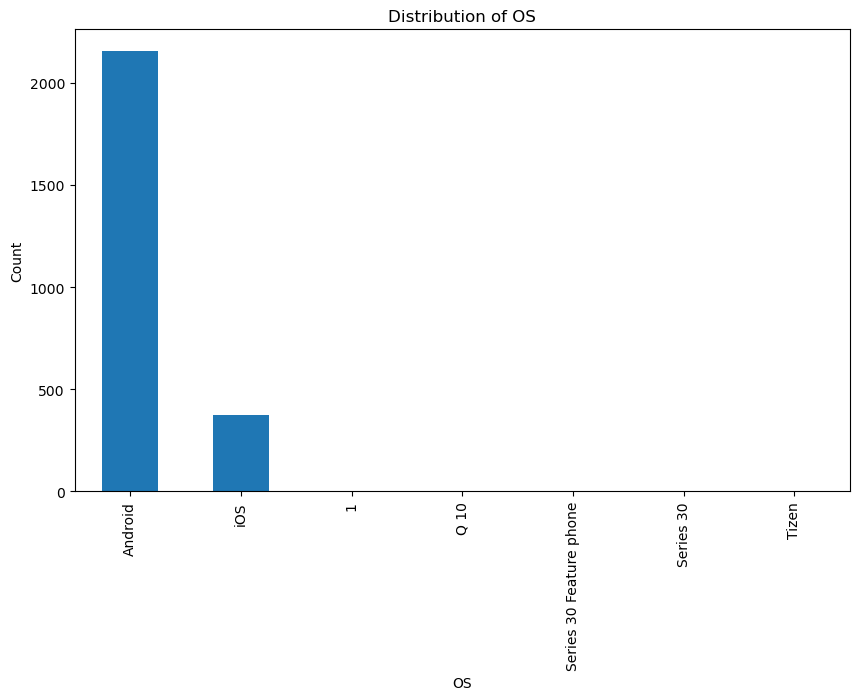

In [26]:
plt.figure(figsize=(10,6))
df1['System'].value_counts().plot(kind='bar')
plt.title('Distribution of OS')
plt.xlabel('OS')
plt.ylabel('Count')
plt.show()

In [27]:
"""Clean the price values."""
def clean_price(price):
    cleaned_price = re.sub(r'\D', '', price)
    # Convert the remaining value to an integer
    try:
        return int(cleaned_price)
    except ValueError:
        return None
df1['price'] = df1['price'].apply(clean_price)
df1.head()


# df1['price_fixed'] = df1['price'].replace('[^\d]', '', regex = True).astype(int)
# df1[['price', 'price_fixed']]
# df1['price'] = df1['price_fixed']
# df1.drop('price_fixed', axis = 1, inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\2777961270.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'].apply(clean_price)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,4.0,iOS,Other


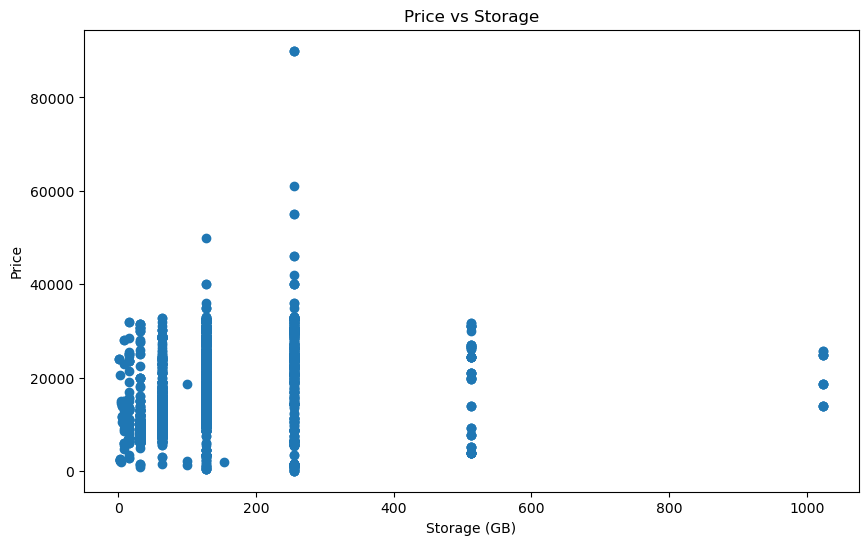

0.27088522618019156

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Storage'], df1['price'])
plt.title('Price vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient between 'price' and 'Storage'
correlation = df1['price'].corr(df1['Storage'])

correlation

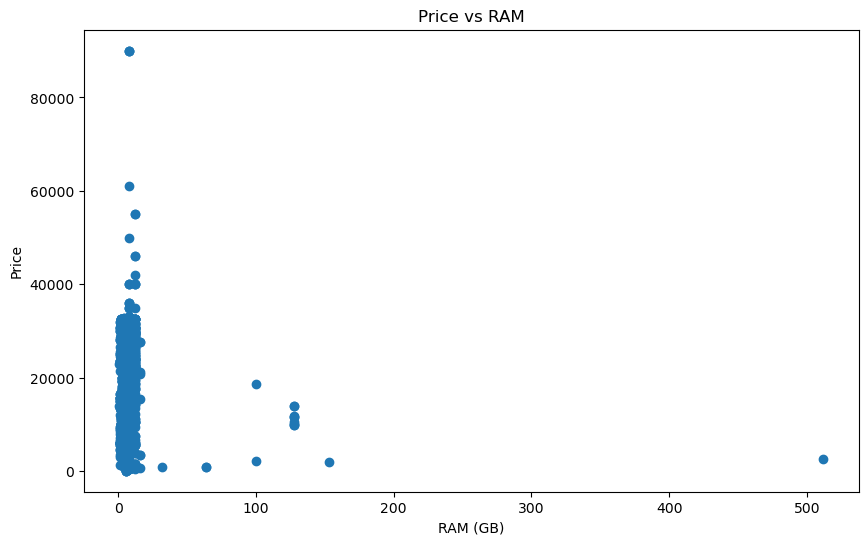

0.02032877631713385

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['RAM'], df1['price'])
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient between 'price' and 'RAM'
correlation = df1['price'].corr(df1['RAM'])

correlation

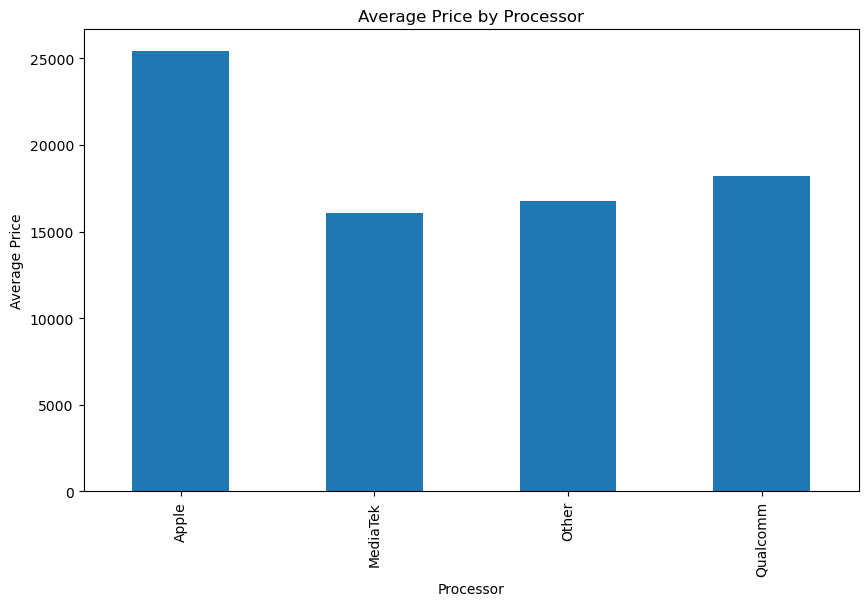

In [30]:
avg_price_processor = df1.groupby('Processor')['price'].mean()

# Plot a bar chart of the average price for each processor
plt.figure(figsize=(10, 6))
avg_price_processor.plot(kind='bar')
plt.title('Average Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Price')
plt.show()


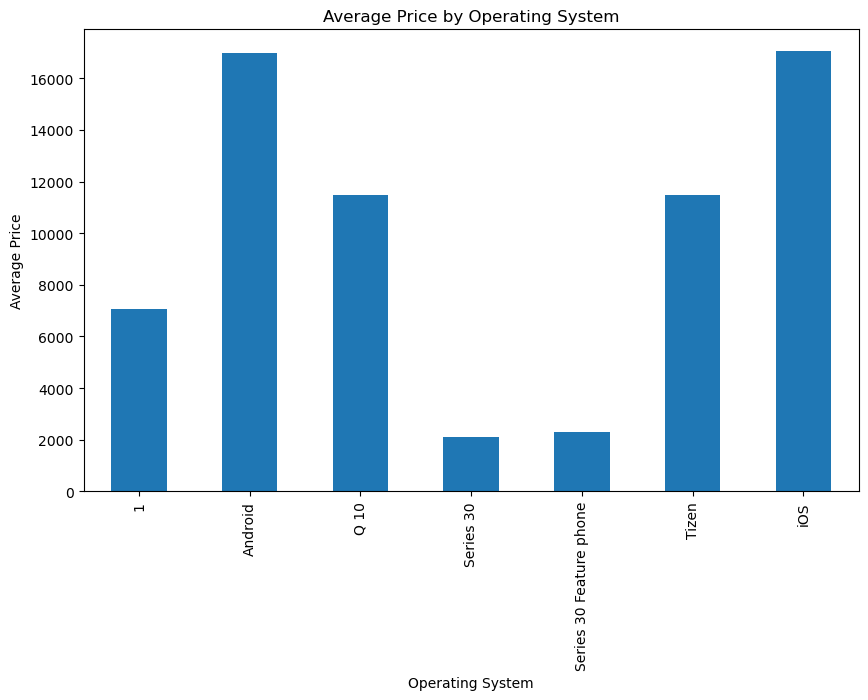

In [31]:
avg_price_system = df1.groupby('System')['price'].mean()

# Plot a bar chart of the average price for each system
plt.figure(figsize=(10, 6))
avg_price_system.plot(kind='bar')
plt.title('Average Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.show()

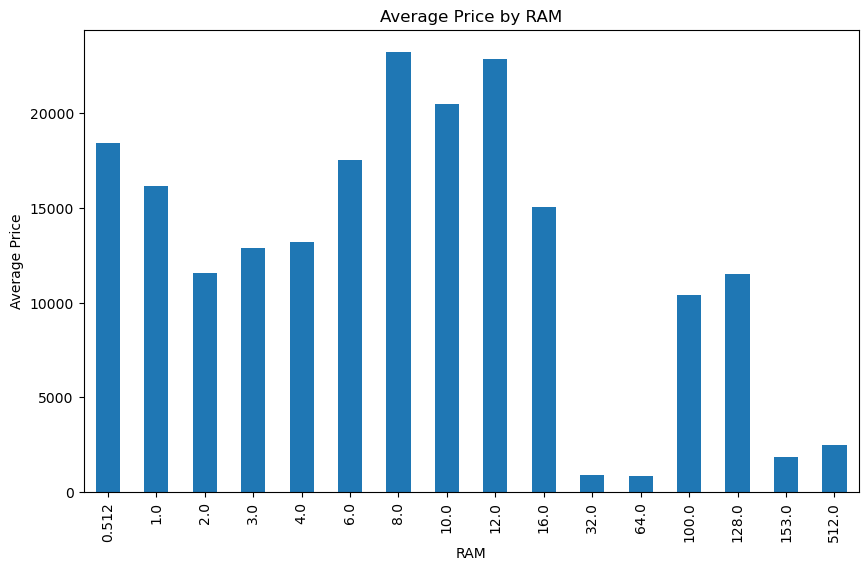

In [32]:
avg_price_ram = df1.groupby('RAM')['price'].mean()

# Plot a bar chart of the average price for each system
plt.figure(figsize=(10, 6))
avg_price_ram.plot(kind='bar')
plt.title('Average Price by RAM')
plt.xlabel('RAM')
plt.ylabel('Average Price')
plt.show()

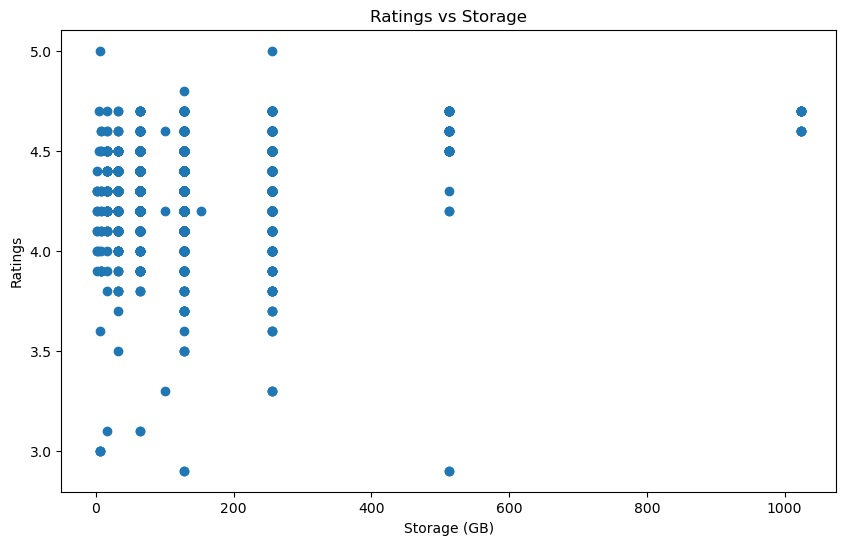

0.20690422834488476

In [33]:
# Plot a scatter plot of 'ratings' vs 'Storage'
plt.figure(figsize=(10, 6))
plt.scatter(df1['Storage'], df1['ratings'])
plt.title('Ratings vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Ratings')
plt.show()

# Calculate the correlation coefficient between 'ratings' and 'Storage'
correlation = df1['ratings'].corr(df1['Storage'])

correlation

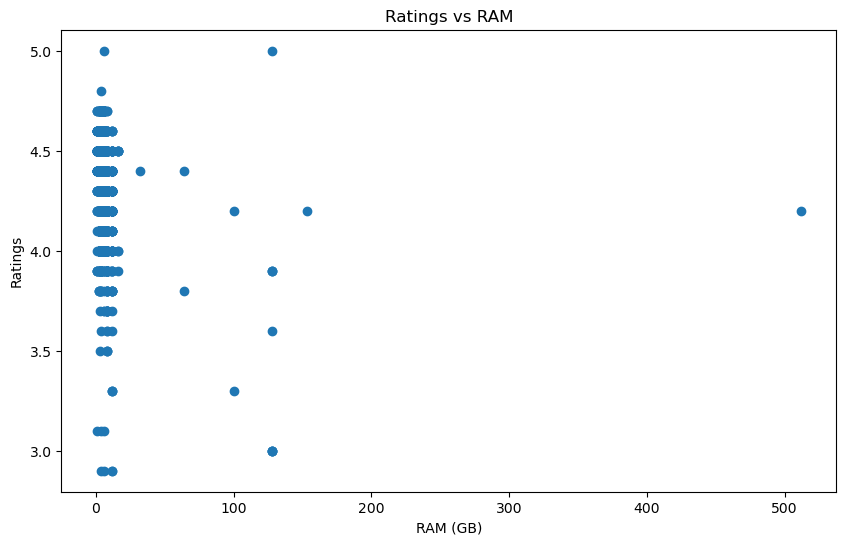

-0.165332066565126

In [34]:
# Plot a scatter plot of 'ratings' vs 'RAM'
plt.figure(figsize=(10, 6))
plt.scatter(df1['RAM'], df1['ratings'])
plt.title('Ratings vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Ratings')
plt.show()

correlation = df1['ratings'].corr(df1['RAM'])

correlation

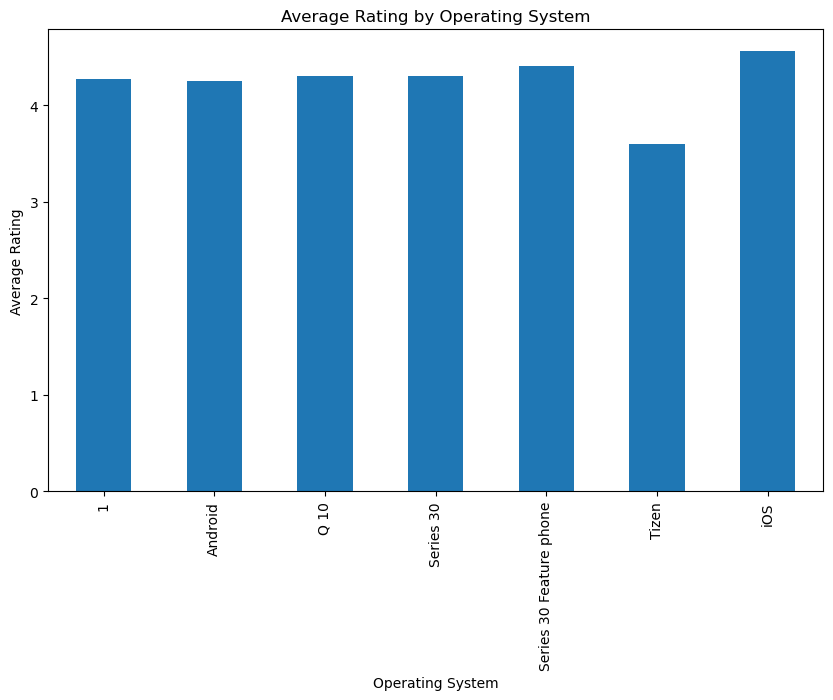

In [35]:
# Calculate the average rating for each system
avg_rating_system = df1.groupby('System')['ratings'].mean()
plt.figure(figsize=(10, 6))
avg_rating_system.plot(kind='bar')
plt.title('Average Rating by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Rating')
plt.show()

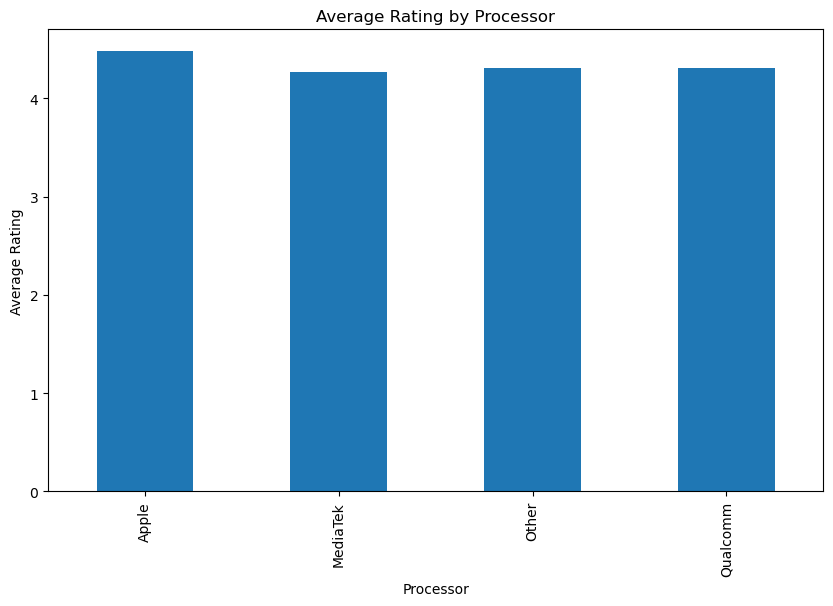

In [36]:
# Calculate the average rating for each processor
avg_rating_processor = df1.groupby('Processor')['ratings'].mean()
plt.figure(figsize=(10, 6))
avg_rating_processor.plot(kind='bar')
plt.title('Average Rating by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Rating')
plt.show()


In [37]:
"""Extract the brand from the name."""
def extract_brand(name):
    return name.split()[0]

df1['Brand'] = df1['name'].apply(extract_brand)
df1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\697116530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Brand'] = df1['name'].apply(extract_brand)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek,REDMI
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other,REDMI
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,4.0,iOS,Other,APPLE


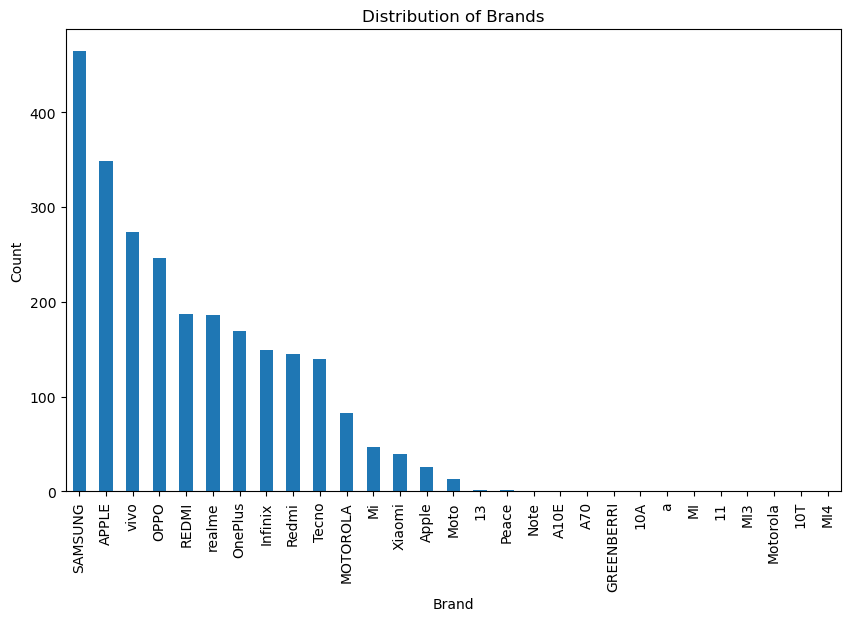

In [38]:
plt.figure(figsize=(10, 6))
df1['Brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

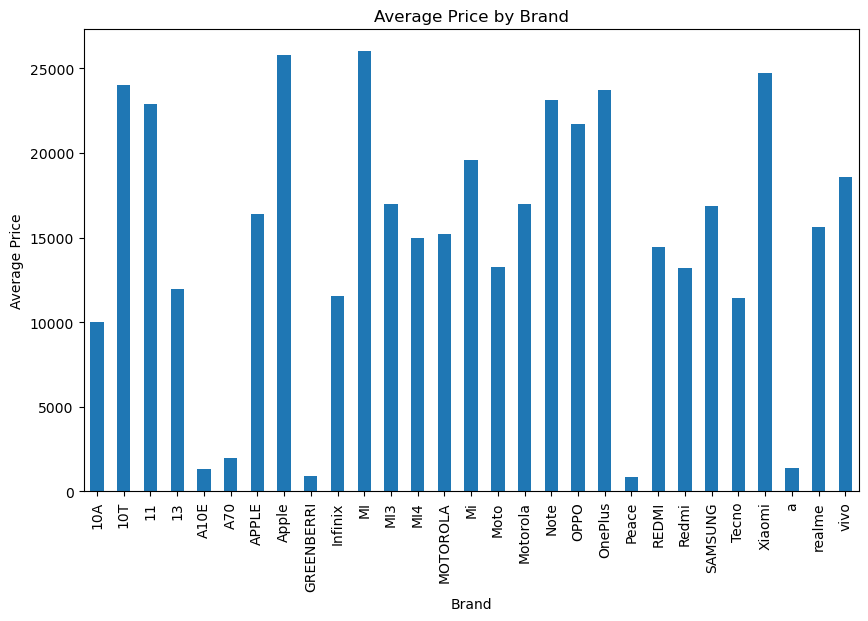

In [39]:
# Calculate the average price for each brand
avg_price_brand = df1.groupby('Brand')['price'].mean()

plt.figure(figsize=(10, 6))
avg_price_brand.plot(kind='bar')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()

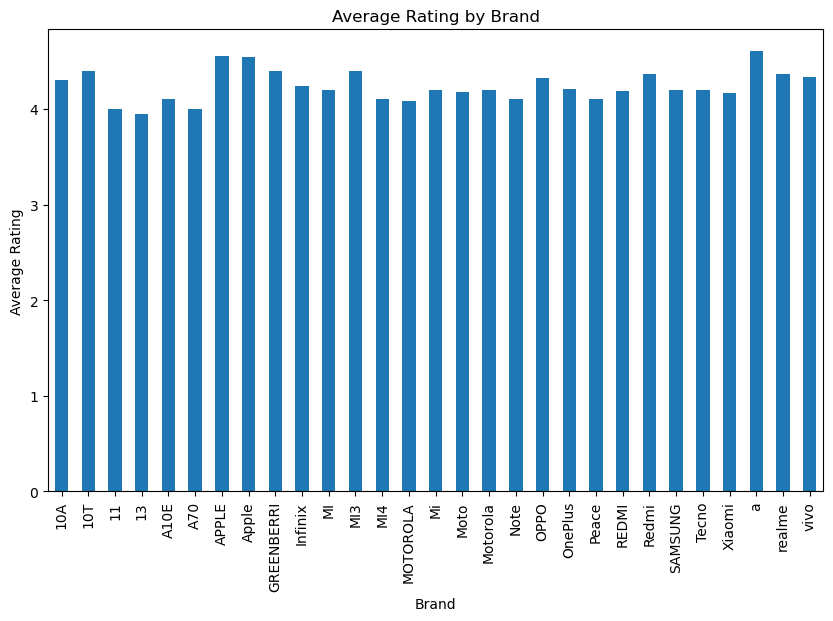

In [40]:
# Calculate the average rating for each brand
avg_rating_brand = df1.groupby('Brand')['ratings'].mean()

plt.figure(figsize=(10, 6))
avg_rating_brand.plot(kind='bar')
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

In [45]:
"""Recommend devices based on user preferences."""
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    # Filter the DataFrame based on the user's preferences
    df_filtered = df1[
        (df1['Brand'] == preferred_brand) &
        (df1['System'] == preferred_system) &
        (df1['price'] >= min_price) &
        (df1['price'] <= max_price)
    ]
    
    # Sort the filtered DataFrame by ratings, and select the top 5 devices
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)
    
    return recommendations

recommend_devices(preferred_brand='Apple', preferred_system='iOS', min_price=30000, max_price=70000)

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
575,"Apple iPhone SE (Black, 128 GB) (Includes EarP...",4.6,32546,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 13Processor TypeA13 Bion...,128.0,2.0,iOS,Other,Apple
1092,"Apple iPhone SE (White, 128 GB) (Includes EarP...",4.6,32546,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 13Processor TypeA13 Bion...,128.0,2.0,iOS,Other,Apple
1940,"Apple iPhone SE (Red, 128 GB) (Includes EarPod...",4.5,32546,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 13Processor TypeA13 Bion...,128.0,2.0,iOS,Other,Apple


In [47]:
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    df_filtered = df1[
        (df1['Brand'] == preferred_brand) &
        (df1['System'] == preferred_system) &
        (df1['price'] >= min_price) &
        (df1['price'] <= max_price)
    ]
    # If no devices match all preferences, filter based on brand and price range
    if df_filtered.empty:
        df_filtered = df1[
            (df1['Brand'] == preferred_brand) &
            (df1['price'] >= min_price) &
            (df1['price'] <= max_price)
        ]
    # If still no devices match, filter based on price range only
    if df_filtered.empty:
        df_filtered = df1[
            (df1['price'] >= min_price) &
            (df1['price'] <= max_price)
        ]
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)
    
    return recommendations

recommend_devices(preferred_brand='OPPO', preferred_system='Android', min_price=20000, max_price=50000)

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
28,"OPPO Reno10 5G (Ice Blue, 256 GB)",4.6,32537,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemAndroid 13Processor TypeDimen...,256.0,NaN,Android,Other,OPPO
600,"OPPO Reno10 5G (Silvery Grey, 256 GB)",4.6,32537,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemAndroid 13Processor TypeDimen...,256.0,NaN,Android,Other,OPPO
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek,OPPO
1965,"OPPO R1 R829 (White, 16 GB)",4.5,21452,https://rukminim2.flixcart.com/image/312/312/m...,Storage16 GBRAM1 SystemAndroid Jelly Bean 4.2...,16.0,1.0,Android,Other,OPPO
1226,"OPPO Reno10 5G (Silvery Grey, 256 GB)",4.5,32999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM8 SystemAndroid 13Processor T...,256.0,8.0,Android,Other,OPPO
